<a href="https://colab.research.google.com/github/amokshagna/ML_proj1/blob/main/mlproj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import files
uploaded = files.upload()  # Upload your .xlsx file


Saving ML proj data.xlsx to ML proj data (1).xlsx


In [12]:
import pandas as pd

df = pd.read_excel('ML proj data.xlsx')
df = df.dropna()

print(df.head())


          States  Factories  Fixed Capital   Productive Capital  \
0    Maharashtra    26059.0      43108696.0          60809251.0   
1        Gujarat    29497.0      76549797.0          91737827.0   
2     Tamil Nadu    39393.0      30150291.0          41519598.0   
3      Karnataka    14235.0      22169880.0          30233694.0   
4  Uttar Pradesh    16503.0      17334875.0          26075052.0   

   Invested Capital    Workers  Total Persons Engaged  Wages to Workers  \
0        68693900.0  1394957.0              1958888.0         3212939.0   
1       100857799.0  1568416.0              2054221.0         2704852.0   
2        45524347.0  2046453.0              2488428.0         3176083.0   
3        31351759.0   768249.0               996680.0         1646122.0   
4        27274260.0   898469.0              1142206.0         1314004.0   

   Total Emoluments  Total Input   Total Output  Depreciation  \
0         8242249.0   101392069.0   125360944.0     3714813.0   
1         627120

In [13]:
features = ['Factories', 'Invested Capital', 'Total Output', 'Net Value Added']
df = df[features]
print(df)

    Factories  Invested Capital  Total Output  Net Value Added
0     26059.0        68693900.0   125360944.0       20254062.0
1     29497.0       100857799.0   149635290.0       19440349.0
2     39393.0        45524347.0    85588228.0       12951354.0
3     14235.0        31351759.0    52647967.0        9546643.0
4     16503.0        27274260.0    57323389.0        7989853.0
5     11638.0        22698132.0    58963165.0        6556767.0
6      9886.0        20522651.0    35664573.0        5723942.0
7     16937.0        29075316.0    44112137.0        5618052.0
8     15342.0        15596749.0    26444406.0        5564698.0
9      9863.0        18799949.0    34994845.0        4640382.0
10     2988.0         8116043.0    22071066.0        4583433.0
11     3246.0        34707491.0    27459491.0        4140243.0
12     4914.0        22807109.0    28355355.0        3861404.0
13    13089.0        14464879.0    25530567.0        3572677.0
14     2677.0         5989553.0    12428673.0        28

In [14]:
#Normalize data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=features)


In [15]:
thresholds = df['Total Output'].quantile([0.40, 0.80]).values  # 25th and 75th percentiles
df['Category'] = pd.cut(
    df['Total Output'],
    bins=[-float('inf'), thresholds[0], thresholds[1], float('inf')],
    labels=['Low Potential', 'Medium Potential', 'High Potential']
)

In [16]:
from sklearn.model_selection import train_test_split

x = df_scaled  # Normalized features
y = df['Category']  # Target labels
# x is the input array feature matrix
# y is the target array
# test size = 0.2 is 20% of data used for testing and 80% for training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.ensemble import RandomForestClassifier

# random_state Sets a seed for the random number generator, ensuring the split can be produced again.
# If you rerun the code with the same random_state value, the split will remain same.
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

                  precision    recall  f1-score   support

  High Potential       1.00      1.00      1.00         1
   Low Potential       1.00      1.00      1.00         4
Medium Potential       1.00      1.00      1.00         3

        accuracy                           1.00         8
       macro avg       1.00      1.00      1.00         8
    weighted avg       1.00      1.00      1.00         8



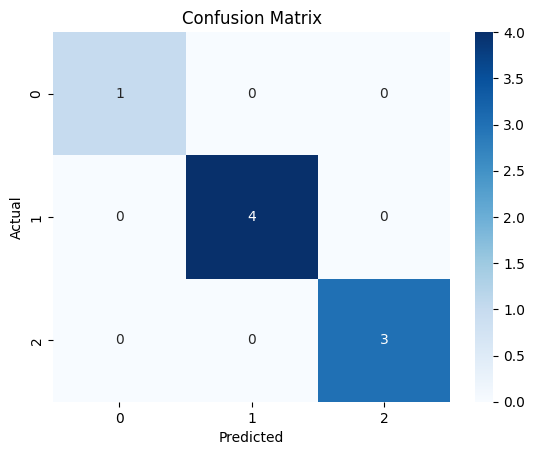

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Evaluate the Model
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
#'d' means the values are displayed as integers.
#cmap='Blues': Sets the colormap for the heatmap.
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [19]:
# df['Prediction'] = model.predict(x)  # Add predictions to the dataset
df.to_excel('classified_states.xlsx', index=False)

# Download the file
from google.colab import files
files.download('classified_states.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>